In [1]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
%pip install money_machine

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement money_machine (from versions: none)
ERROR: No matching distribution found for money_machine
Note: you may need to restart the kernel to use updated packages.


In [2]:
advertising = pd.DataFrame(pd.read_csv("/Users/chauthanhuy/Documents/DATA/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## EDA

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### DATA CLEANING

In [6]:
advertising.isnull().sum()*100/advertising.shape[0] #Check giá trị null và check xem gía trị null chiếm bao nhiêu % trong tổng dữ liệu

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

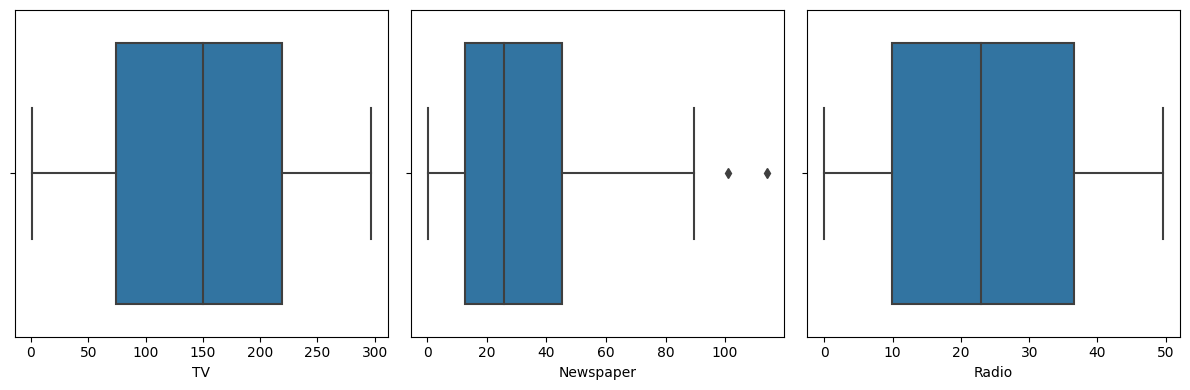

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
plt1 = sns.boxplot(x=advertising['TV'], orient='h', ax=axs[0])
plt2 = sns.boxplot(x=advertising['Newspaper'], orient='h', ax=axs[1])
plt3 = sns.boxplot(x=advertising['Radio'], orient='h', ax=axs[2])

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
# Check xem có oulier không 
# Nhìn chung không có outlier chỉ có 2 cái ở hình thức newspaper

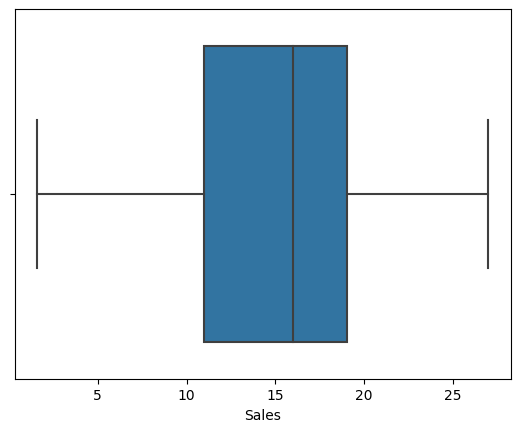

In [8]:
sns.boxplot(x=advertising['Sales'], orient='h')
plt.show()
# Check biến phụ thuộc của mình

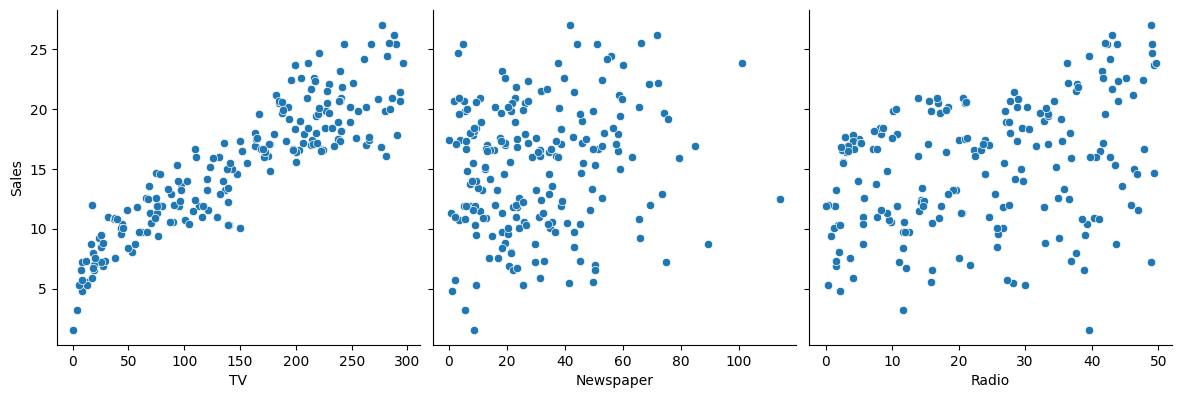

In [9]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
# Xem mối quan hệ giữa biến phụ thuộc và các biến độc lậo

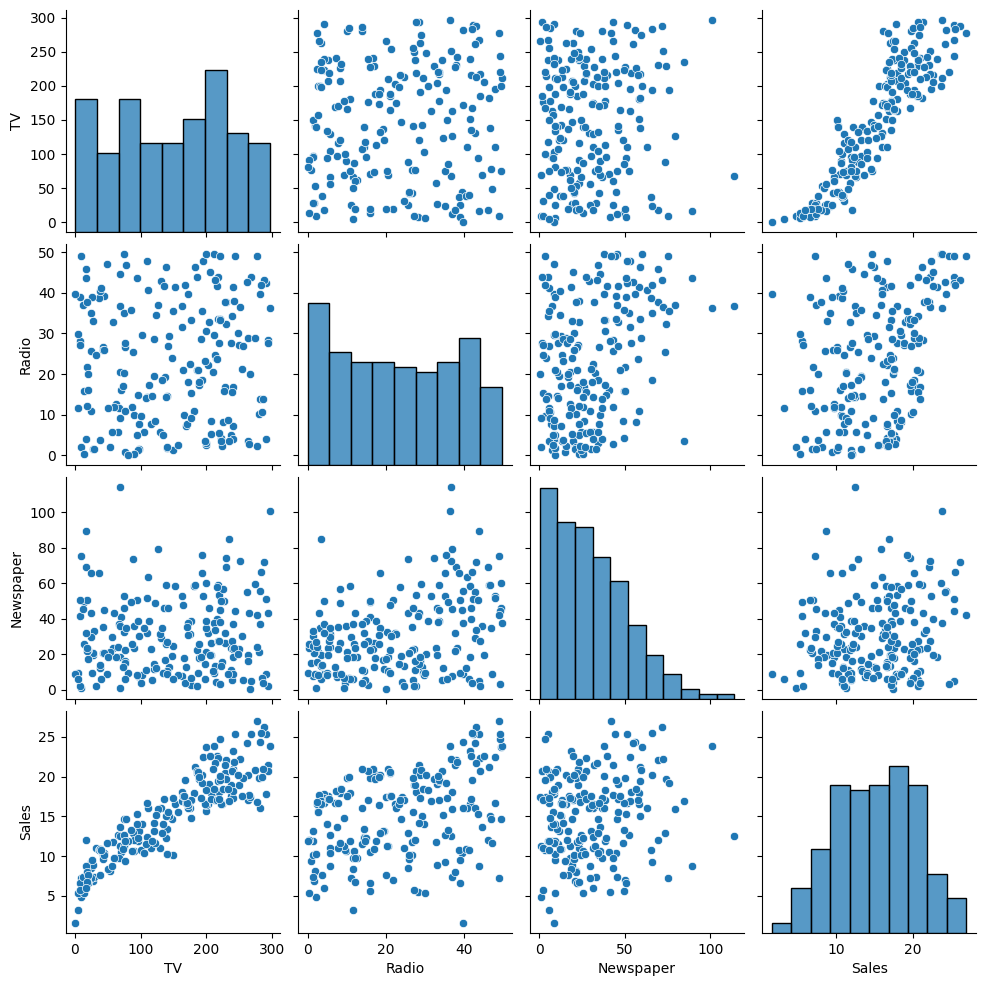

In [13]:
sns.pairplot(advertising)

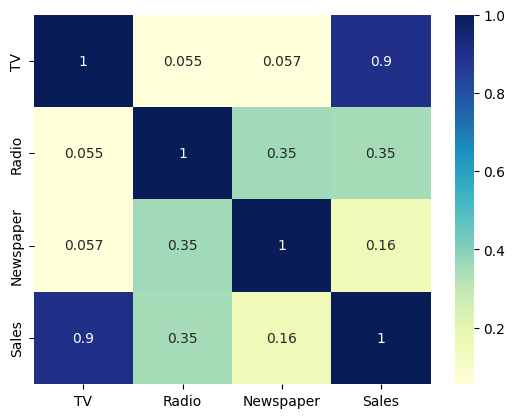

In [14]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

## BUILDING MODEL

Performing Simple Linear Regression¶
Equation of linear regression
y = c+ m1x1 + m2x2 +...+ mnxn

- y is the response
- c is the intercept
- m1 is the coefficient for the first feature
- mn is the coefficient for the nth feature
In our case:

y = c + m1×TV

The m
 values are called the model coefficients or model parameters.



In [15]:
X = advertising['TV']
y = advertising['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [19]:
import statsmodels.api as sm

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.52e-52
Time:                        19:06:07   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value¶
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

Ta có mô hình linear regression tương ứng là:

$ Sales = 6.948 + 0.054 \times TV $

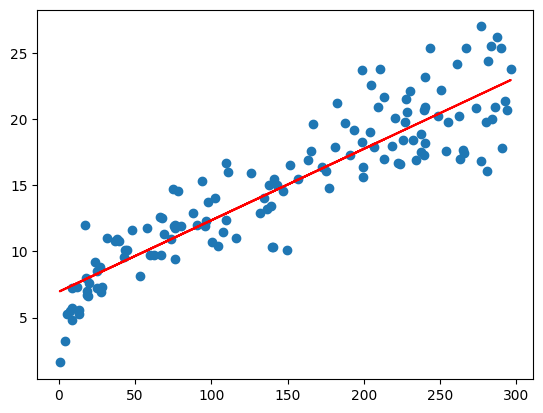

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [24]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

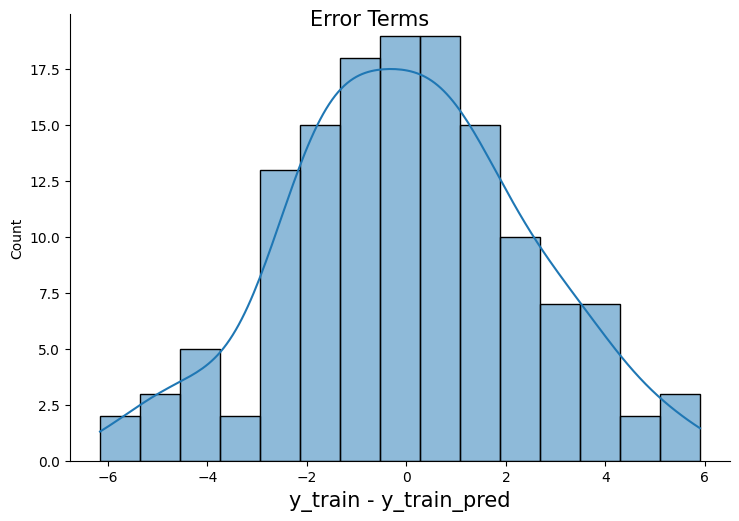

In [27]:
sns.displot(res, bins=15, kde=True, height=5, aspect=1.5)  # `height` và `aspect` điều chỉnh kích thước
plt.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()


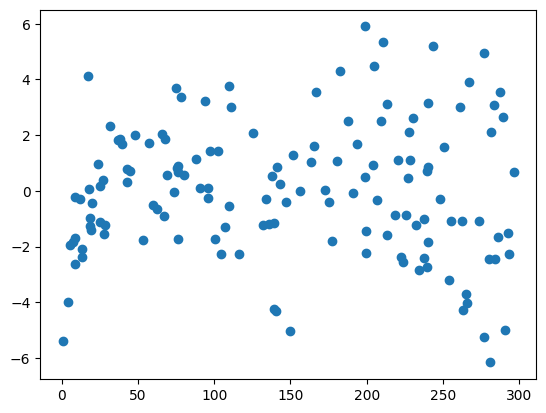

In [28]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. 

For this, you first need to add a constant to the X_test data like you did for 

X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.



In [29]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

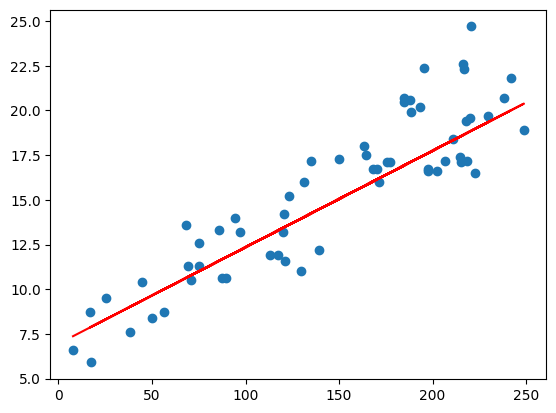

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()